In [1]:
#Khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#Khởi tạo dữ liệu
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,49.905501,6.794388,12.288495,16.560704,16.455388
1,59.303097,1.529225,11.283922,-2.832654,22.856757
2,57.605266,9.009467,3.629508,4.257659,25.091317
3,58.356839,11.226361,9.496349,9.678457,26.576562
4,58.016909,9.683167,10.600090,14.835278,20.182082


<AxesSubplot:ylabel='Density'>

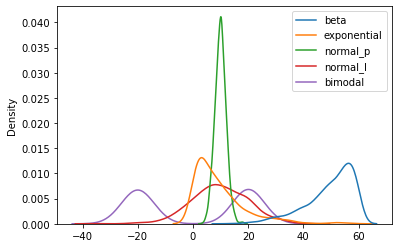

In [5]:
# trực quan hóa dữ liệu
sns.kdeplot(data=df)

In [6]:
#Hiển thị thống kê về dữ liệu sinh ra
fdf.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.671487,9.512515,9.980642,9.713677,0.064801
std,8.658205,9.423888,2.032704,10.173212,20.289082
min,13.514332,0.000134,3.629508,-34.964041,-28.481415
25%,45.288719,2.779000,8.682056,3.024963,-19.992444
50%,51.912297,6.818071,10.001076,9.506253,0.919897
75%,56.426897,13.013842,11.266565,16.707684,20.028211
max,59.975525,58.480461,18.096160,41.803413,28.160191


<AxesSubplot:ylabel='Density'>

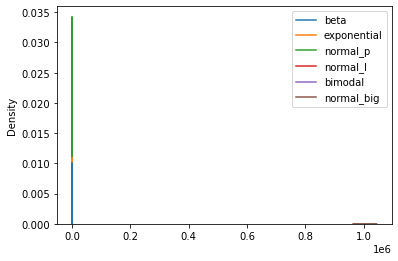

In [7]:
#Thêm một đặc trưng với giá trị lớn hơn nhiều
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

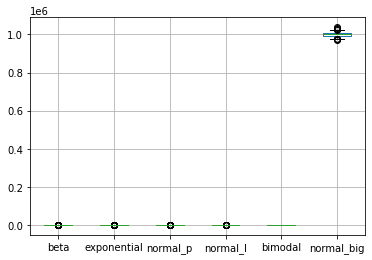

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [9]:
#Chuẩn hóa với StandardScaler (Z-Score scaling)
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sách cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.027042,-0.288574,1.135929,0.673381,0.808257,1.352827
1,1.112982,-0.847557,0.641477,-1.233889,1.123923,-0.999809
2,0.916789,-0.053407,-3.126039,-0.536581,1.234114,-1.391919
3,1.003637,0.181953,-0.238370,-0.003464,1.307355,-0.341633
4,0.964357,0.018118,0.304894,0.503692,0.992029,0.571576


<AxesSubplot:ylabel='Density'>

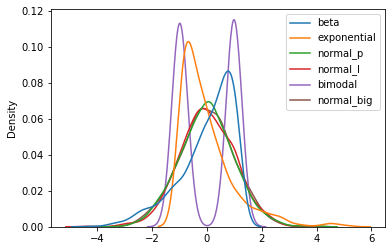

In [12]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [13]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,7.128742e-16,-1.605382e-16,8.792966e-17,1.029073e-16,-1.008083e-16,5.045908e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.178146e+00,-1.009895e+00,-3.126039e+00,-4.393900e+00,-1.407678e+00,-2.973530e+00
25%,-5.064515e-01,-7.148731e-01,-6.391661e-01,-6.578121e-01,-9.890680e-01,-6.333881e-01
50%,2.589372e-01,-2.860594e-01,1.005752e-02,-2.039952e-02,4.216670e-02,-3.183016e-03
75%,7.806226e-01,3.717233e-01,6.329336e-01,6.878365e-01,9.844407e-01,6.381149e-01
max,1.190685e+00,5.198751e+00,3.994472e+00,3.155915e+00,1.385447e+00,3.844291e+00


<AxesSubplot:>

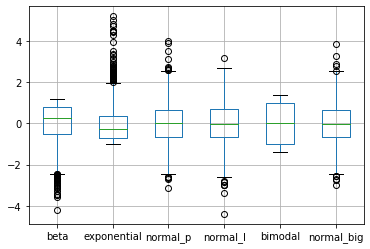

In [14]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [ ]:
#Chúng ta có thể thấy rằng các phân phối đã được điều chỉnh và giá trị trung bình là một số rất nhỏ gần bằng 0 và độ lệch chuẩn rất gần bằng 1 cho mỗi biến.